# Acciones de Apple

### Vamos a utilizar el precio de las acciones de Apple.


### 1. Importar las librerías necesarias

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import matplotlib.pyplot as plt

### 2. Importar el dataset de la siguiente [url](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [4]:
pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv", parse_dates=['Date'])

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### 3. Asignar el dataset a la variable *``apple``* y aplicar ``head()``

In [5]:
apple = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv")
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 4. Obtener el tipo de variable de las columnas

In [6]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 5. Transformar la columna Date a tipo *``datetime``* y ejecutar el método *``info()``*

In [7]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### 6. Establecer la información de fecha como índice

In [8]:
apple.set_index(['Date'], inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 7.  Hay fechas duplicadas?

In [9]:
apple.index.nunique() - len(apple.index)

0

In [10]:
apple.index.is_unique

True

### 8.  Ops...parece que el índice es desde la fecha más reciente a la más antigua. Modifique el índice, de manera que la fecha más antigua sea la primera entrada.

In [12]:
apple.sort_index(inplace=True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### 9. Obtenga el último día hábil de cada mes.

In [13]:
ejer_9 = apple.asfreq('BM').index
ejer_9

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', name='Date', length=403, freq='BM')

### 10.  ¿Cuál es la diferencia en días entre el primer día y el más antiguo?

In [14]:
ejer_10 = apple.index[len(apple.index)-1] - apple.index[0]
ejer_10

Timedelta('12261 days 00:00:00')

### 11. ¿De cuántos meses disponemos?

In [15]:
ejer_11 = (np.datetime64(apple.index[len(apple.index)-1]) - np.datetime64(apple.index[0])).astype('timedelta64[M]')
ejer_11

numpy.timedelta64(402,'M')

### 12. Traza y visualiza la variable 'Adj Close'. Establece el tamaño de la figura en 13,5 x 9 pulgadas.

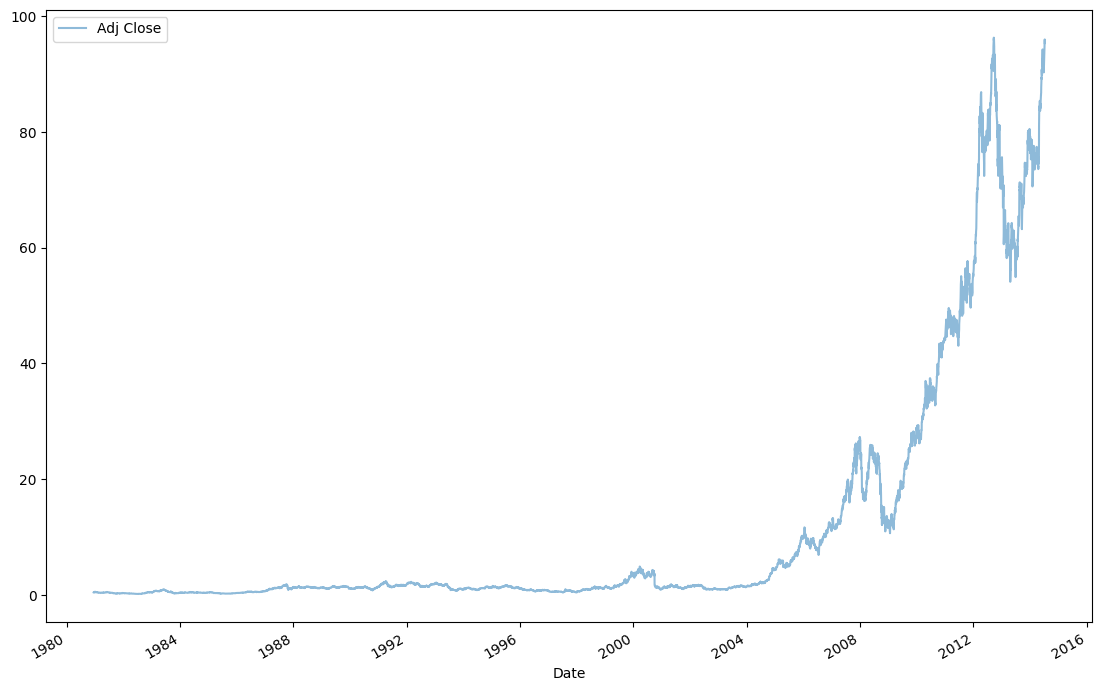

In [50]:
plt.figure(figsize=(13.5,9))
apple['Adj Close'].plot(alpha=0.5, style='-')

plt.legend(['Adj Close'],
           loc='upper left');

### BONUS: crea tu popia pregunta y respóndela.

In [66]:
apple.groupby(apple.index.year)['Volume'].sum()

Date
1980      336212800
1981     2049236000
1982     5341252000
1983    10420166400
1984    10494758400
1985    11373318400
1986    13330805600
1987    14942827200
1988    10323244400
1989    12726456400
1990    11100485200
1991    14336912800
1992    10284478400
1993    14113232000
1994    14288974000
1995    18566634800
1996    13298555200
1997    17990840000
1998    28798548800
1999    34275676400
2000    30075399200
2001    23664449200
2002    19253481800
2003    17807563200
2004    30450417200
2005    45600245600
2006    53924741500
2007    61748996400
2008    71495301500
2009    35813421700
2010    37756231800
2011    31014834900
2012    32991051100
2013    25605392400
2014     9372161900
Name: Volume, dtype: int64

In [62]:
# Haz una grafica que represente el volumen anual

ejer_bonus = apple.resample('A').sum()['Volume']
ejer_bonus

Date
1980-12-31      336212800
1981-12-31     2049236000
1982-12-31     5341252000
1983-12-31    10420166400
1984-12-31    10494758400
1985-12-31    11373318400
1986-12-31    13330805600
1987-12-31    14942827200
1988-12-31    10323244400
1989-12-31    12726456400
1990-12-31    11100485200
1991-12-31    14336912800
1992-12-31    10284478400
1993-12-31    14113232000
1994-12-31    14288974000
1995-12-31    18566634800
1996-12-31    13298555200
1997-12-31    17990840000
1998-12-31    28798548800
1999-12-31    34275676400
2000-12-31    30075399200
2001-12-31    23664449200
2002-12-31    19253481800
2003-12-31    17807563200
2004-12-31    30450417200
2005-12-31    45600245600
2006-12-31    53924741500
2007-12-31    61748996400
2008-12-31    71495301500
2009-12-31    35813421700
2010-12-31    37756231800
2011-12-31    31014834900
2012-12-31    32991051100
2013-12-31    25605392400
2014-12-31     9372161900
Freq: A-DEC, Name: Volume, dtype: int64

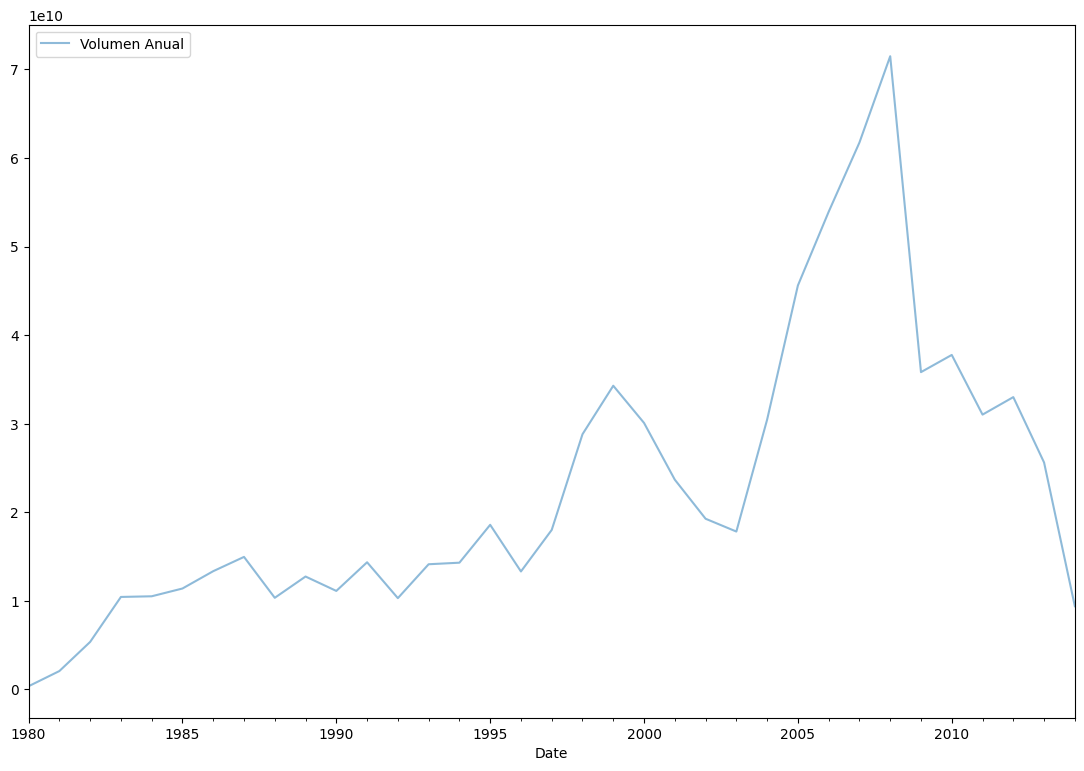

In [63]:
plt.figure(figsize=(13.5,9))
ejer_bonus.plot(alpha=0.5, style='-')

plt.legend(['Volumen Anual'],
           loc='upper left');